In [1]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
def get_year(txt):
    year=txt[0:4]
    return year

In [4]:
get_year (df["date"][0])

'2014'

In [5]:
df["year"]=df["date"].apply(get_year)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [6]:
num=int(df['yr_built'][0])
print(num)

1955


In [7]:
def get_age(txt):
    txt=int(txt)
    age=2021-txt
    age=str(age)
    return age

In [8]:
get_age (df["yr_built"][0])

'66'

In [9]:
df["age"]=df["yr_built"].apply(get_age)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,66
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,70
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,88
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,56
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,12
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,7
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,12
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,17


In [10]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 24 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

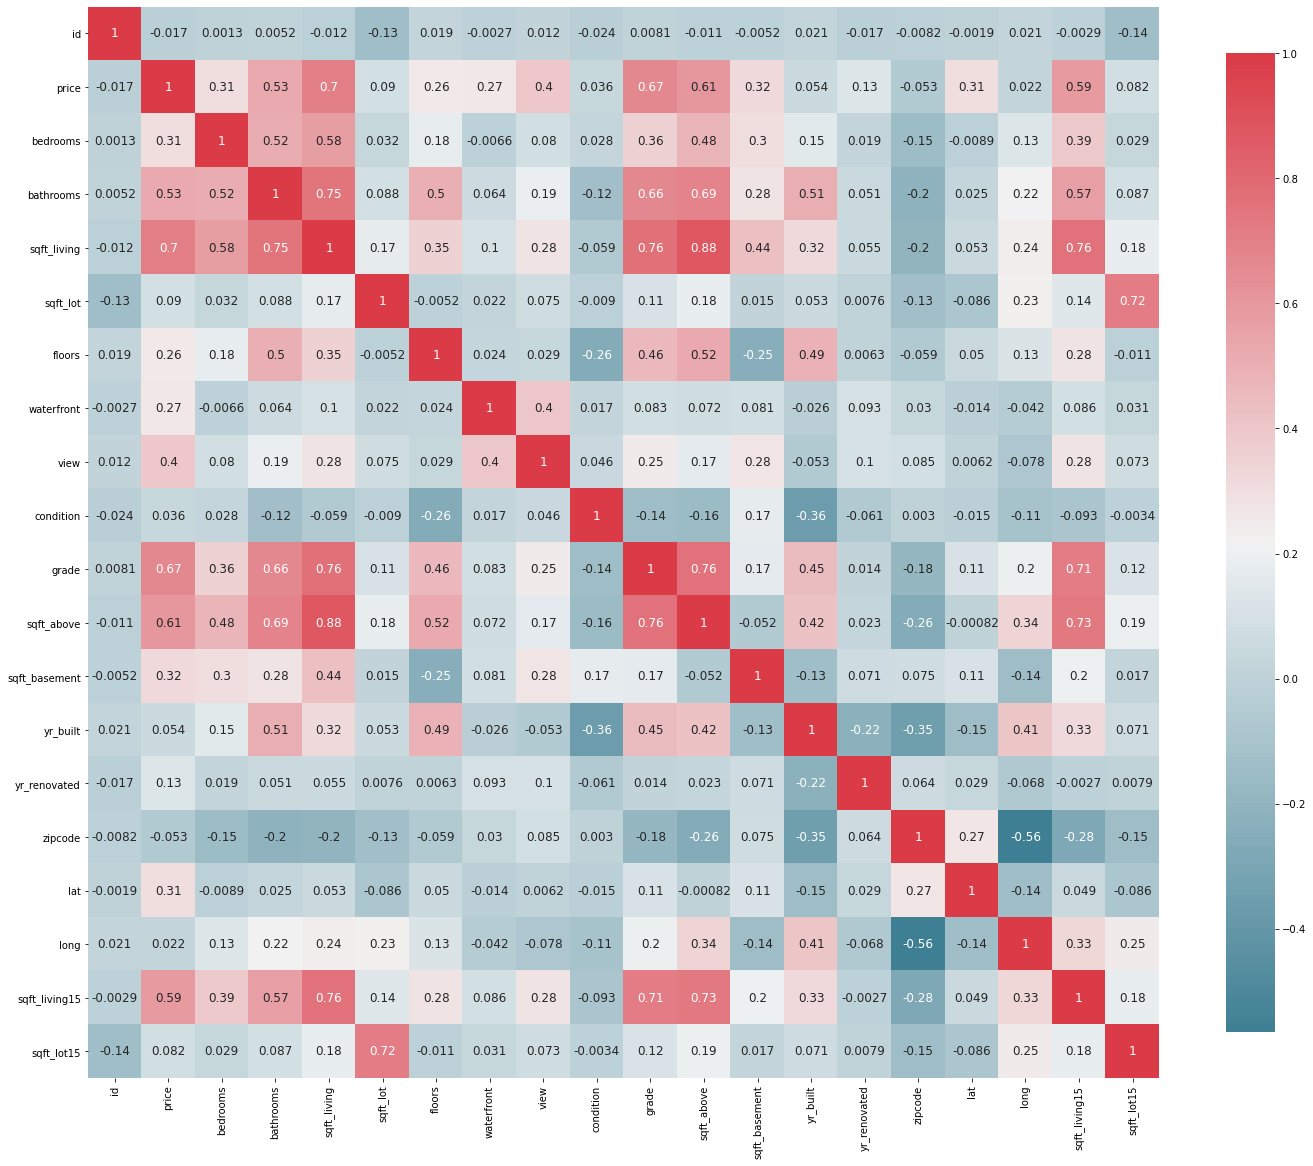

In [11]:
plot_correlation_map(df)

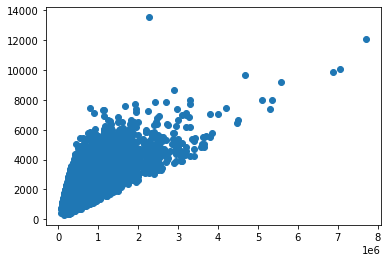

In [12]:
plt.scatter(df['price'],df['sqft_living'])
plt.show()

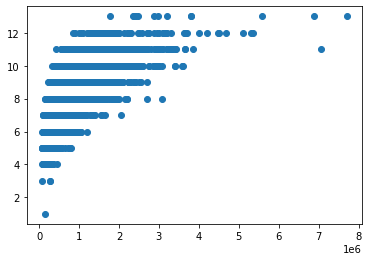

In [13]:
plt.scatter(df['price'],df['grade'])
plt.show()

In [14]:
Y=df['price']
X=df['grade']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [15]:
train_test_split(X,Y)

[4931      8
 6137      7
 20908     7
 5165      8
 11986     7
          ..
 8067      8
 18069    10
 3568      7
 4322      7
 6497      8
 Name: grade, Length: 16209, dtype: int64,
 1234      6
 614       7
 20724     8
 1789      7
 13566    10
          ..
 6521      8
 4999      7
 17477     6
 9489      7
 12724     7
 Name: grade, Length: 5404, dtype: int64,
 4931      300000.0
 6137      325000.0
 20908     350000.0
 5165      300000.0
 11986     330000.0
            ...    
 8067      825000.0
 18069    1735000.0
 3568      372220.0
 4322      410000.0
 6497      355000.0
 Name: price, Length: 16209, dtype: float64,
 1234     250275.0
 614      242000.0
 20724    420000.0
 1789     341000.0
 13566    806000.0
            ...   
 6521     439000.0
 4999     547000.0
 17477    293000.0
 9489     238000.0
 12724    130000.0
 Name: price, Length: 5404, dtype: float64]

In [16]:
Y=df['price']
X=df['sqft_living']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [17]:
train_test_split(X,Y)

[18343    2510
 9314     1140
 20559    1630
 20444    2400
 17407    3890
          ... 
 2147     2170
 18355    1502
 161      1780
 8830     3316
 11944    3190
 Name: sqft_living, Length: 16209, dtype: int64,
 21607    1310
 18703    2230
 9246     1380
 17042    1500
 15902    2180
          ... 
 4714     1810
 14325     870
 1091     1530
 17609    2340
 12837    2950
 Name: sqft_living, Length: 5404, dtype: int64,
 18343     330000.0
 9314      903000.0
 20559     295000.0
 20444     500012.0
 17407    1802750.0
            ...    
 2147      353000.0
 18355     403000.0
 161       438000.0
 8830      490600.0
 11944    1030000.0
 Name: price, Length: 16209, dtype: float64,
 21607    475000.0
 18703    360000.0
 9246     475000.0
 17042    360000.0
 15902    480500.0
            ...   
 4714     827500.0
 14325    365000.0
 1091     448000.0
 17609    535000.0
 12837    930000.0
 Name: price, Length: 5404, dtype: float64]

In [18]:
x=df["price"].values[:,np.newaxis]
y=df["grade"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.7570802302199182
R squared 0.4554237506621951


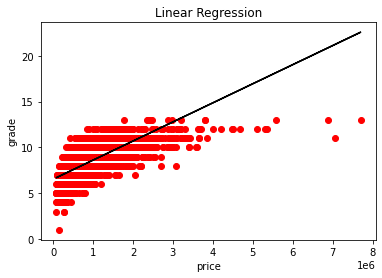

In [19]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("grade")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [20]:
x=df["price"].values[:,np.newaxis]
y=df["sqft_living"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 419107.76546734595
R squared 0.49875223400847035


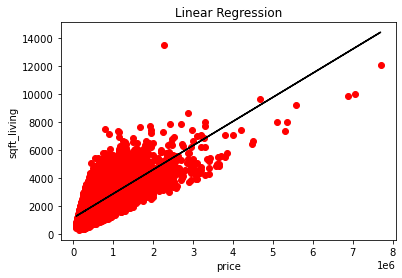

In [21]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [22]:
y=df["price"]  
x=df[["sqft_living","grade"]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57413775762.86427
R squared 0.5433112989852685


In [23]:
x= df[["grade", "sqft_living"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  50395738051.00105
R squared:  0.5991351580455235
